In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/PiotrNawrot/dynamic-pooling.git
%cd dynamic-pooling

Cloning into 'dynamic-pooling'...
remote: Enumerating objects: 204, done.
remote: Counting objects: 100% (204/204), done.
remote: Compressing objects: 100% (146/146), done.
remote: Total 204 (delta 67), reused 177 (delta 42), pack-reused 0 (from 0)
Receiving objects: 100% (204/204), 1.49 MiB | 3.74 MiB/s, done.
Resolving deltas: 100% (67/67), done.
/content/dynamic-pooling


In [3]:
!pip install torch transformers datasets numpy scikit-learn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
import json

def load_jsonl(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line.strip()))
    return data

In [5]:
train_data = load_jsonl("/content/drive/MyDrive/SNLP Group Project/Datasets/AraStance/train.jsonl")
dev_data = load_jsonl("/content/drive/MyDrive/SNLP Group Project/Datasets/AraStance/dev.jsonl")
test_data = load_jsonl("/content/drive/MyDrive/SNLP Group Project/Datasets/AraStance/test.jsonl")

In [6]:
import torch
print(torch.cuda.is_available())

False


In [7]:
from transformers import AutoTokenizer

# Choose a suitable Arabic-compatible model
MODEL_NAME = "bert-base-multilingual-cased"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

In [8]:
# Print a few entries from the dataset
print(train_data[:3])  # Print first 3 samples

[{'filename': 'first_batch/false2_611.json', 'claim': 'ظهور علم مصر على برج خليفة', 'claim_url': 'https://dabegad.com/%d8%ad%d9%82%d9%8a%d9%82%d8%a9-%d8%b8%d9%87%d9%88%d8%b1-%d8%b9%d9%84%d9%85-%d9%85%d8%b5%d8%b1-%d8%b9%d9%84%d9%89-%d8%a8%d8%b1%d8%ac-%d8%ae%d9%84%d9%8a%d9%81%d8%a9/', 'article': ['استمرّت الحضارة المصرية القديمة ثلاثة آلاف عام، حيث ترك ملوكها معالماً تختزل كمّاً هائلاً من المهارة والمعرفة في الهندسة المعمارية والفنون، فما زالت العديد من آثارهم قائمةً حتّى هذا اليوم وبحالة جيدة، فالعديد من الأهرامات والمعابد وتماثيل أبي الهول لا تزال تجذب السياح من جميع أنحاء العالم بعد مرور آلاف السنين على بنائها،[١] كما ارتبطت الأهرامات بالحضارة المصرية في أذهان الناس على الرغم من وجودها في العديد من الحضارات القديمة الأخرى؛ كالحضارة الصينية وحضارة المايا.[٢] بُنيت أهرامات الجيزة الثلاث على هضبة صخرية تقع على الضفة الغربية لنهر النيل بالقرب من الجيزة شمال مصر، وقد كانت هذه الأهرامات إحدى عجائب الدنيا السبعة القديمة، بالإضافة إلى أنّها اختيرت كموقع من مواقع التراث العالمي لليونسكو عام 19

In [9]:
# Check if 'stance' exists in all records
for i, item in enumerate(train_data[:5]):  # Check first 5 samples
    print(f"Sample {i}: {item.keys()}")

Sample 0: dict_keys(['filename', 'claim', 'claim_url', 'article', 'stance', 'article_title', 'article_url'])
Sample 1: dict_keys(['filename', 'claim', 'claim_url', 'article', 'stance', 'article_title', 'article_url'])
Sample 2: dict_keys(['filename', 'claim', 'claim_url', 'article', 'stance', 'article_title', 'article_url'])
Sample 3: dict_keys(['filename', 'claim', 'claim_url', 'article', 'stance', 'article_title', 'article_url'])
Sample 4: dict_keys(['filename', 'claim', 'claim_url', 'article', 'stance', 'article_title', 'article_url'])


In [10]:
for i, item in enumerate(train_data[:5]):  # Print first 5 samples
    print(f"Sample {i}: {item['stance']} (Type: {type(item['stance'])})")

Sample 0: ['Unrelated', 'Unrelated', 'Unrelated', 'Unrelated', 'Unrelated', 'Unrelated', 'Unrelated'] (Type: <class 'list'>)
Sample 1: ['Discuss', 'Discuss', 'Disagree', 'Disagree'] (Type: <class 'list'>)
Sample 2: ['Unrelated', 'Unrelated'] (Type: <class 'list'>)
Sample 3: ['Unrelated', 'Unrelated'] (Type: <class 'list'>)
Sample 4: ['Unrelated', 'Unrelated'] (Type: <class 'list'>)


In [11]:
# Function to tokenize inputs
def preprocess(data):
    texts = [item["claim"] for item in data if "claim" in item]  # Extract claims
    labels = [item["stance"] for item in data]  # Extract stances

    encodings = tokenizer(texts, truncation=True, padding=True, max_length=512, return_tensors="pt")

    # Define label mapping
    label_map = {"Agree": 0, "Disagree": 1, "Discuss": 2, "Unrelated": 3}

    # Extract first stance if it's a list
    labels = [label[0] if isinstance(label, list) and len(label) > 0 else "Unrelated" for label in labels]

    # Convert labels to numerical format
    labels = [label_map.get(label, 3) for label in labels]

    return encodings, labels

In [12]:
train_encodings, train_labels = preprocess(train_data)
dev_encodings, dev_labels = preprocess(dev_data)
test_encodings, test_labels = preprocess(test_data)

In [13]:
print(train_labels[:5])  # Should be a list of integers

[3, 2, 3, 3, 3]


In [14]:
# Convert dataset into a Pytorch dataset
class StanceDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

In [15]:
# Create dataset instances
train_dataset = StanceDataset(train_encodings, train_labels)
dev_dataset = StanceDataset(dev_encodings, dev_labels)
test_dataset = StanceDataset(test_encodings, test_labels)

In [16]:
# Load pre-trained Transformer model
from transformers import AutoModelForSequenceClassification

MODEL_NAME = "bert-base-multilingual-cased"  # You can change this to an Arabic-friendly model
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=4)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [17]:
# Define training parameters
from torch.utils.data import DataLoader
from transformers import AdamW

BATCH_SIZE = 16

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
dev_loader = DataLoader(dev_dataset, batch_size=BATCH_SIZE, shuffle=False)

optimizer = AdamW(model.parameters(), lr=2e-5)

/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [18]:
# Train the model
from transformers import get_scheduler
from tqdm import tqdm

num_epochs = 3
num_training_steps = num_epochs * len(train_loader)
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

model.train()

for epoch in range(num_epochs):
    loop = tqdm(train_loader, leave=True)
    for batch in loop:
        batch = {k: v.to(device) for k, v in batch.items()}

        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()

        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()

        loop.set_description(f"Epoch {epoch+1}")
        loop.set_postfix(loss=loss.item())

# Save the trained model
torch.save(model.state_dict(), "stance_model.pth")

Epoch 3: 100%|██████████| 40/40 [07:11<00:00, 10.78s/it, loss=0.796]


In [19]:
# Evaluate the model
from sklearn.metrics import accuracy_score

model.eval()
predictions, true_labels = [], []

for batch in dev_loader:
    batch = {k: v.to(device) for k, v in batch.items()}

    with torch.no_grad():
        outputs = model(**batch)

    logits = outputs.logits
    preds = torch.argmax(logits, dim=-1).cpu().numpy()
    labels = batch["labels"].cpu().numpy()

    predictions.extend(preds)
    true_labels.extend(labels)

accuracy = accuracy_score(true_labels, predictions)
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Accuracy: 0.5074


In [20]:
# Test on the test.jsonl file
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

predictions, true_labels = [], []

for batch in test_loader:
    batch = {k: v.to(device) for k, v in batch.items()}

    with torch.no_grad():
        outputs = model(**batch)

    logits = outputs.logits
    preds = torch.argmax(logits, dim=-1).cpu().numpy()
    labels = batch["labels"].cpu().numpy()

    predictions.extend(preds)
    true_labels.extend(labels)

accuracy = accuracy_score(true_labels, predictions)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.6131


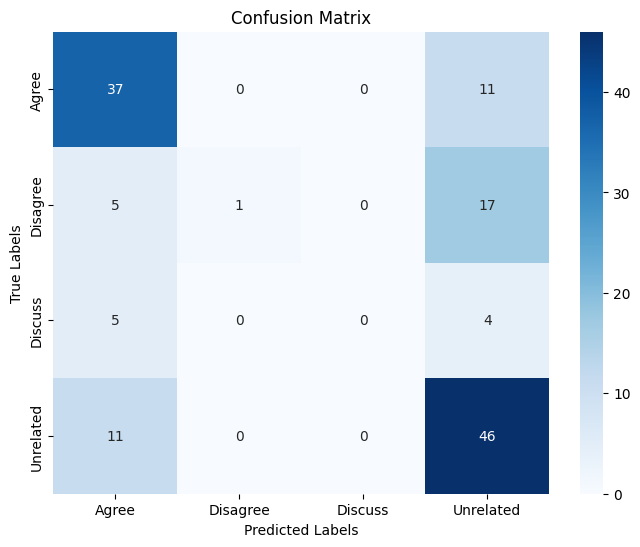

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-21-75208eaac5fd>:30: FutureWarning

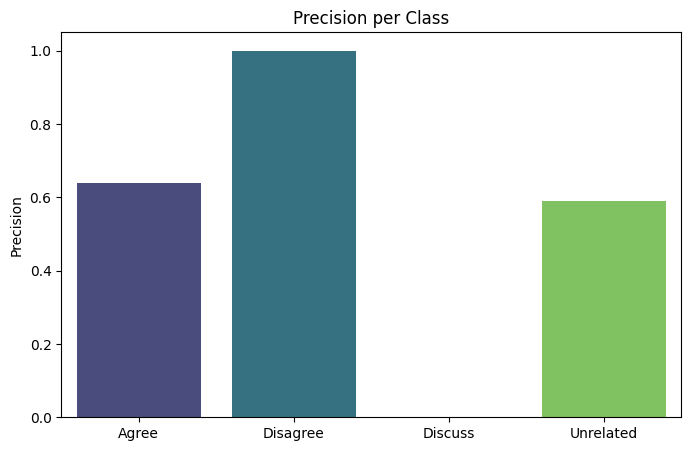

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

# Convert predictions and true labels to numpy arrays
true_labels = np.array(true_labels)
predictions = np.array(predictions)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predictions)
label_names = ["Agree", "Disagree", "Discuss", "Unrelated"]

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Compute and display classification report
report = classification_report(true_labels, predictions, target_names=label_names, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Plot accuracy per class
plt.figure(figsize=(8, 5))
class_accuracies = df_report.loc[label_names, "precision"]
sns.barplot(x=label_names, y=class_accuracies, palette="viridis")
plt.ylabel("Precision")
plt.title("Precision per Class")
plt.show()